In [97]:
# Import tools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import SGDClassifier

In [2]:
# Load train and test data
train_df = pd.read_csv("training_sample.csv")
test_df = pd.read_csv("testing_sample.csv")

In [3]:
# View info about training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [4]:
# View info about test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   151655 non-null  object
 1   basket_icon_click        151655 non-null  int64 
 2   basket_add_list          151655 non-null  int64 
 3   basket_add_detail        151655 non-null  int64 
 4   sort_by                  151655 non-null  int64 
 5   image_picker             151655 non-null  int64 
 6   account_page_click       151655 non-null  int64 
 7   promo_banner_click       151655 non-null  int64 
 8   detail_wishlist_add      151655 non-null  int64 
 9   list_size_dropdown       151655 non-null  int64 
 10  closed_minibasket_click  151655 non-null  int64 
 11  checked_delivery_detail  151655 non-null  int64 
 12  checked_returns_detail   151655 non-null  int64 
 13  sign_in                  151655 non-null  int64 
 14  saw_checkout        

In [5]:
# Union datasets together
df = pd.concat([train_df, test_df])

In [29]:
# Report order rate
order_rate = df["ordered"].value_counts(normalize = True).values[1]
print("About %.2f%% of customers placed an order." % (order_rate * 100))

About 3.15% of customers placed an order.


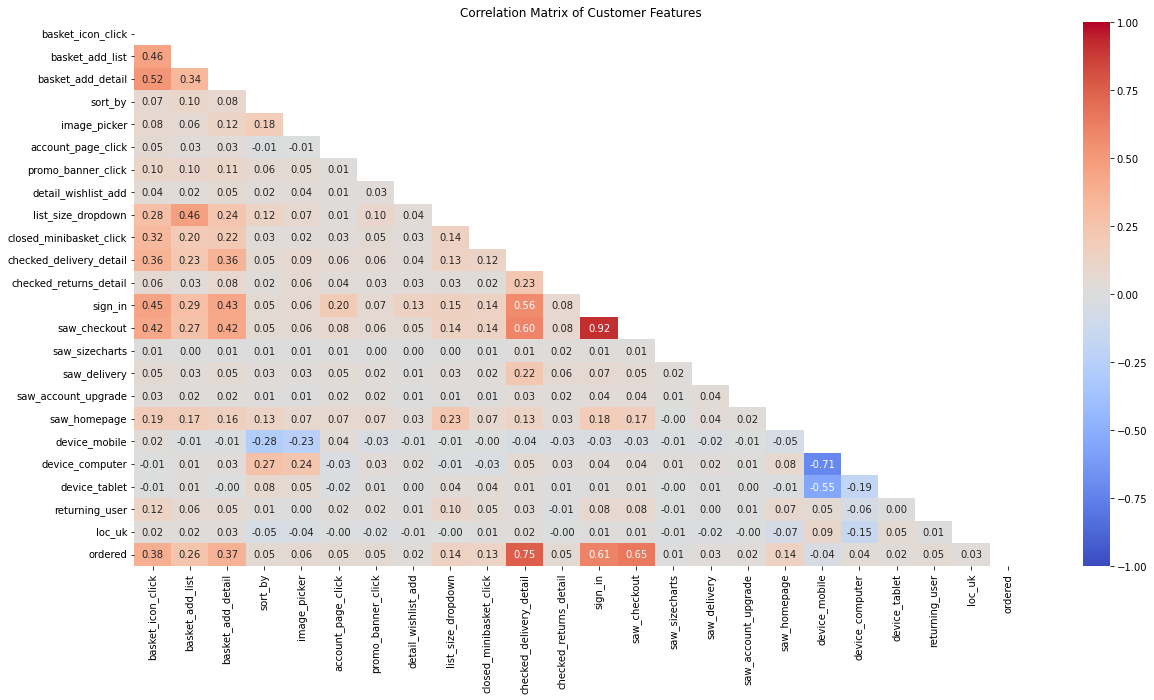

In [63]:
# View correlation matrix
fig, ax = plt.subplots(figsize = (20, 10))
mask = np.triu(df.corr())
ax = sns.heatmap(df.corr(), annot = True, fmt = ".2f", vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", mask = mask)
ax.set_title("Correlation Matrix of Customer Features")
plt.show()

In [40]:
# View correlations with target feature by strength
df.corr()["ordered"].sort_values(ascending = False, key = lambda x: np.abs(x))

ordered                    1.000000
checked_delivery_detail    0.753749
saw_checkout               0.653194
sign_in                    0.608471
basket_icon_click          0.383696
basket_add_detail          0.370965
basket_add_list            0.255553
saw_homepage               0.136508
list_size_dropdown         0.135693
closed_minibasket_click    0.125442
image_picker               0.062375
returning_user             0.052439
checked_returns_detail     0.051814
account_page_click         0.050382
promo_banner_click         0.050202
sort_by                    0.047227
device_computer            0.041525
device_mobile             -0.037038
loc_uk                     0.027906
saw_delivery               0.027649
saw_account_upgrade        0.022670
detail_wishlist_add        0.020950
device_tablet              0.015821
saw_sizecharts             0.006920
Name: ordered, dtype: float64

In [68]:
# Split data into input and output features
X = df.drop("ordered", axis = 1)
y = df["ordered"]

In [89]:
# Build data pipeline
ct = ColumnTransformer(transformers = [("drop", "drop", "UserID")], remainder = "passthrough")
pipeline = Pipeline(steps = [("drop", ct), ("scaler", StandardScaler()), ("model", SGDClassifier())])

In [117]:
# Build and evaluate model
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 8)
results = cross_validate(pipeline, X, y, scoring = "f1", cv = cv, n_jobs = -1, return_estimator = True)
print("F1 score: %.2f%% (%.2f%%)" % (np.mean(results["test_score"] * 100), np.std(results["test_score"] * 100)))

F1 score: 89.30% (0.46%)


In [116]:
[scores["estimator"][0].named_steps["model"].coef_.flatten() for model in scores["estimator"]]

array([ 2.73706130e-02,  1.99996784e-02,  2.05597876e-02,  3.11278458e-03,
        7.46544926e-03, -3.60317002e-02,  4.30634776e-03, -2.83133044e-02,
       -1.29123840e-02,  1.74178219e-02,  1.21509785e+01, -1.60481887e-02,
        1.49987903e+01,  2.35991371e+01, -3.06297882e-02, -1.51067375e-01,
        1.81657529e-02,  2.84789037e-02,  1.51767621e-02,  2.06751195e-02,
        1.32066275e-03,  1.19346157e-02,  5.07753768e-02])